In [2]:
from src.utils.config import get_config_from_path
from src.segmentation.model import setup_segmentation_model
from PIL import Image
import numpy as np
import torch
from albumentations import Compose, Flip, PadIfNeeded
from albumentations.pytorch import ToTensorV2
import cv2
from pathlib import Path
from torchvision.ops.focal_loss import sigmoid_focal_loss
from src.segmentation.dataset import BubDataset

config = get_config_from_path('./configs/unet_ef1.py')
config.ckpt_path = Path('/home/nekrut/tmp/seg_train_wdp/unet_fs/09_09_23-12_05_40/epoch_1000.pt')

In [16]:
import cv2
img = Image.open(
    '/home/nekrut/dataset/water_processing/seg_fs/mask/2.6_frame_30_mask.png',
)

In [44]:
# ret, thresh = cv2.threshold(np.asarray(img), 127, 255, 0)
im2, contours = cv2.findContours(np.asarray(img), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

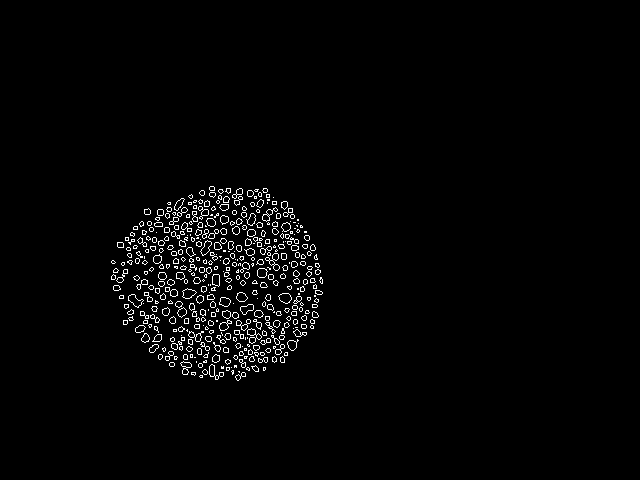

In [53]:
Image.fromarray(cv2.drawContours(np.asarray(img), im2, -1, (255, 0, 0), 1))

In [30]:
Image.fromarray(im2)

AttributeError: 'tuple' object has no attribute '__array_interface__'

In [22]:
model = setup_segmentation_model(config, load_ckpt=True)

In [4]:
dataset = BubDataset(config, inference_mode=True)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'str'

In [49]:
img, gt = dataset.__getitem__(0)

NameError: name 'dataset' is not defined

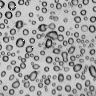

In [24]:
Image.fromarray((img[0].numpy() * 255).astype(np.uint8))

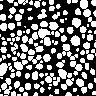

In [7]:
Image.fromarray((gt[0].numpy() * 255).astype(np.uint8))

In [5]:
transforms = Compose([
    PadIfNeeded(
        min_height=None,
        min_width=None,
        pad_height_divisor=32,
        pad_width_divisor=32,
        border_mode=cv2.BORDER_CONSTANT,
        position=PadIfNeeded.PositionType.TOP_LEFT,
    ),
    ToTensorV2(),
])

In [7]:
img_t = transforms(image=np.asarray(img))['image'] / 127.5 - 1

In [8]:
img_t.shape

torch.Size([1, 480, 640])

In [9]:
res = model.predict(img_t.cuda().unsqueeze(0)).sigmoid()[0, 0].cpu().numpy()

/home/nekrut/miniconda3/envs/water_drops_processing/lib/python3.9/site-packages/efficientnet_pytorch/utils.py:275: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343997789/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  x = F.conv2d(x, self.weight, self.bias, self.stride, self.padding, self.dilation, self.groups)


In [10]:
res.shape

(480, 640)

In [11]:
res

array([[   0.017318,   0.0013086,  0.00024226, ...,  0.00038169,   0.0030685,    0.088124],
       [ 0.00086288,  7.2944e-06,  3.0261e-07, ...,  3.6752e-07,  1.7906e-05,   0.0076734],
       [ 9.3002e-05,  1.5367e-07,  2.1164e-09, ...,   1.994e-09,  3.7728e-07,   0.0011646],
       ...,
       [ 0.00040606,  1.3848e-06,  2.1857e-08, ...,   6.071e-09,  7.8411e-07,  0.00092994],
       [  0.0026611,  5.2258e-05,  2.6701e-06, ...,  7.7423e-07,  2.5405e-05,   0.0041595],
       [   0.045171,   0.0057916,   0.0013496, ...,  0.00048353,   0.0025763,    0.033001]], dtype=float32)

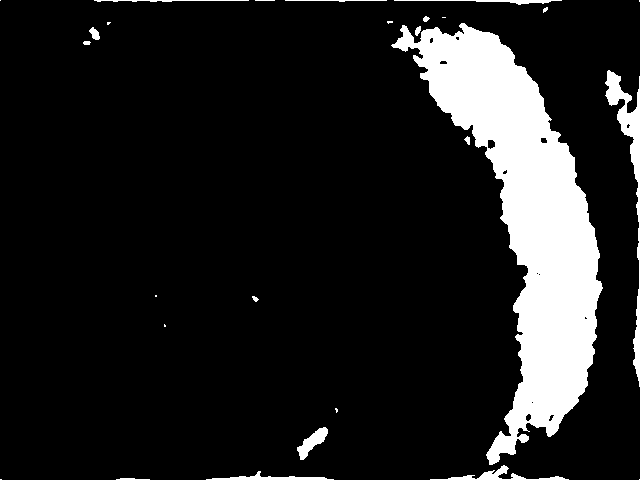

In [15]:
Image.fromarray((res > 0.005).astype(np.uint8) * 255)

In [34]:
res

array([[    0.98154,     0.97923,     0.97663, ...,     0.54496,      0.1098,    0.012543],
       [    0.99001,      0.9888,     0.98745, ...,     0.62474,     0.13742,    0.015017],
       [    0.99461,     0.99399,     0.99329, ...,     0.69828,     0.17067,    0.017969],
       ...,
       [     0.9631,     0.97081,     0.97695, ...,     0.54766,      0.1802,    0.038375],
       [     0.8788,     0.91147,     0.93598, ...,     0.47892,      0.1829,    0.051699],
       [    0.66822,     0.76118,     0.83454, ...,     0.41098,     0.18564,    0.069317]], dtype=float32)